# **Dataset - HR Data MNC (Regressão)**

O objetivo do grupo ao analisar esse dataset é, por meio dos dados de Recursos Humanos de uma multinacional, descobrir qual o salário dos funcionários.

## **0. Inserção das bibliotecas e leitura dos arquivos**

Nessa etapa será feita a leitura do arquivo (dataset) a ser analisado pelo grupo, além da criação do dataframe.

#### Imports Python

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # Para mostrar todas as colunas no .describe()

#### Leitura do Dataset

In [2]:
df_salario = pd.read_csv('Salario/HR_Data_MNC_Data Science Lovers.csv', encoding='latin1')

Aplicando Normalização no Salario

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Criar o scaler
scaler = MinMaxScaler()

# Escolher a coluna de salário (ajuste o nome se for diferente)
col_salario = 'Salary_INR'

# Adicionar uma nova coluna normalizada
df_salario['Salary_Normalized'] = scaler.fit_transform(df_salario[[col_salario]])

# Exibir as primeiras linhas para confirmar
df_salario[['Salary_INR', 'Salary_Normalized']].head()


,Salary_INR,Salary_Normalized
0,1585363,0.476065
1,847686,0.202848
2,1430084,0.418553
3,990689,0.255813
4,535082,0.087068


In [5]:
df_salario.head()

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Salary_Normalized
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363,0.476065
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686,0.202848
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084,0.418553
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689,0.255813
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082,0.087068


## **1. Análise Exploratória dos Dados**

PLACEHOLDER

O grupo iniciou utilizando a função .info() do dataframe, para verificar contagem total de valores não nulos e o tipo de dado de cada coluna.

In [6]:
df_salario.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Unnamed: 0          2000000 non-null  int64  
 1   Employee_ID         2000000 non-null  object 
 2   Full_Name           2000000 non-null  object 
 3   Department          2000000 non-null  object 
 4   Job_Title           2000000 non-null  object 
 5   Hire_Date           2000000 non-null  object 
 6   Location            2000000 non-null  object 
 7   Performance_Rating  2000000 non-null  int64  
 8   Experience_Years    2000000 non-null  int64  
 9   Status              2000000 non-null  object 
 10  Work_Mode           2000000 non-null  object 
 11  Salary_INR          2000000 non-null  int64  
 12  Salary_Normalized   2000000 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 198.4+ MB


In [7]:
df_salario.describe(include='all')

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR,Salary_Normalized
count,2.000000e+06,2000000,2000000,2000000,2000000,2000000,2000000,2.000000e+06,2.000000e+06,2000000,2000000,2.000000e+06,2.000000e+06
unique,NaN,2000000,467487,7,29,5479,1593497,NaN,NaN,4,2,NaN,NaN
top,NaN,EMP0000001,Michael Smith,IT,Software Engineer,2022-10-31,"Lake Michael, Congo",NaN,NaN,Active,On-site,NaN,NaN
freq,NaN,1,1014,601042,300358,622,20,NaN,NaN,1401558,1199109,NaN,NaN
mean,9.999995e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000148e+00,5.010287e+00,NaN,NaN,8.968878e+05,2.210715e-01
std,5.773504e+05,NaN,NaN,NaN,NaN,NaN,NaN,1.413973e+00,3.608823e+00,NaN,NaN,4.026103e+05,1.491163e-01
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,NaN,3.000000e+05,0.000000e+00
25%,4.999998e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,2.000000e+00,NaN,NaN,6.163460e+05,1.171662e-01
50%,9.999995e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,5.000000e+00,NaN,NaN,8.110265e+05,1.892708e-01
75%,1.499999e+06,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+00,8.000000e+00,NaN,NaN,1.073745e+06,2.865749e-01


In [8]:
df_salario.corr(numeric_only=True).style.background_gradient(cmap= 'magma')

,Unnamed: 0,Performance_Rating,Experience_Years,Salary_INR,Salary_Normalized
Unnamed: 0,1.000000,0.000786,0.000349,-0.000683,-0.000683
Performance_Rating,0.000786,1.000000,-0.000283,-0.000209,-0.000209
Experience_Years,0.000349,-0.000283,1.000000,0.000796,0.000796
Salary_INR,-0.000683,-0.000209,0.000796,1.000000,1.000000
Salary_Normalized,-0.000683,-0.000209,0.000796,1.000000,1.000000


Análise de valores ausentes e duplicados

In [10]:
print("Valores ausentes por coluna:")
print(df_salario.isnull().sum())

duplicadas = df_salario.duplicated().sum()
print(f"\nTotal de linhas duplicadas: {duplicadas}")


Valores ausentes por coluna:
Unnamed: 0            0
Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary_INR            0
Salary_Normalized     0
dtype: int64

Total de linhas duplicadas: 0


Distribuição das variáveis numéricas

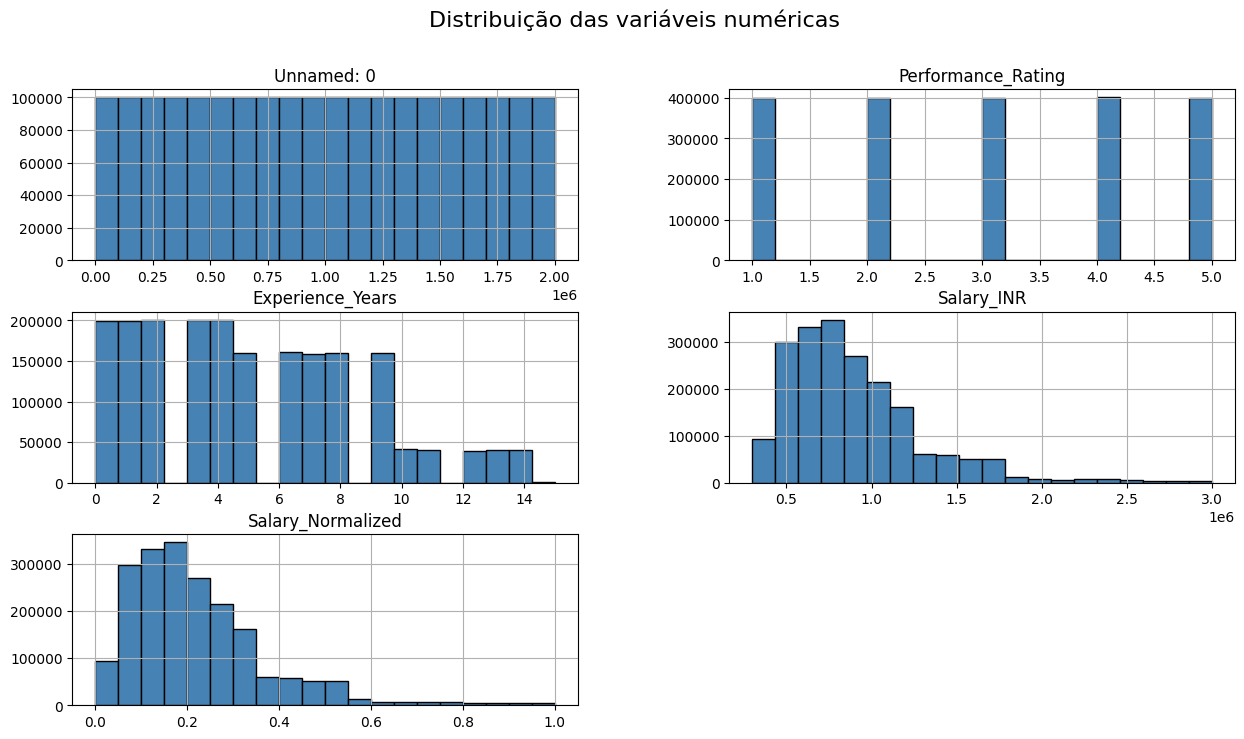

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df_salario.hist(bins=20, figsize=(15, 8), color='steelblue', edgecolor='black')
plt.suptitle('Distribuição das variáveis numéricas', fontsize=16)
plt.show()


Boxplots do salário por categoria

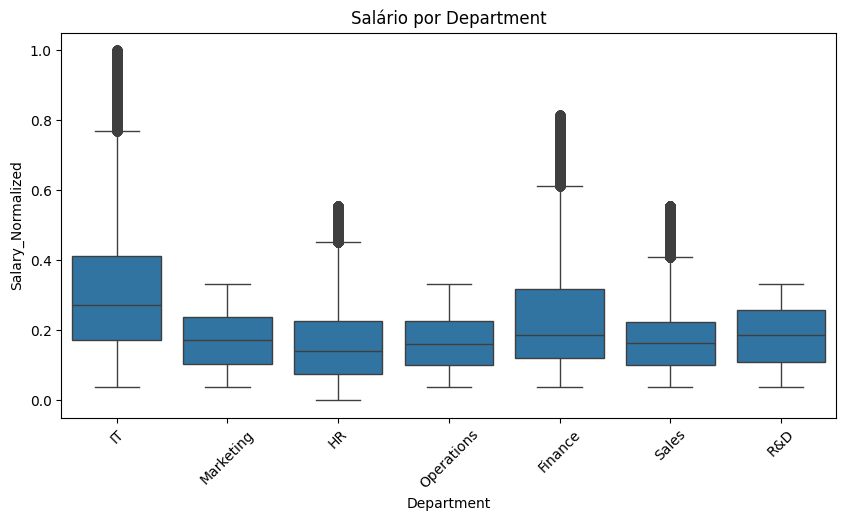

In [ ]:
col_salario = 'Salary_Normalized'

categoricas = ["Department",
               #"Job_Title", 
               #"Hire_Date", 
               "Location", 
               #"Performance_Rating",
               #"ArithmeticError",
               "Experience_Years", 
               "Status", 
               "Work_Mode"]
for col in categoricas:
    if col in df_salario.columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=col, y=col_salario, data=df_salario)
        plt.title(f'Salário por {col}')
        plt.xticks(rotation=45)
        plt.show()


Correlação entre variáveis numéricas

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_salario.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de correlação entre variáveis numéricas')
plt.show()


NameError: name 'plt' is not defined

Médias salariais por categoria

In [ ]:
if 'Job_Title' in df_salario.columns and 'Department' in df_salario.columns:
    print("Média salarial por Cargo:")
    print(df_salario.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False).head(10))
    
    print("\nMédia salarial por Departamento:")
    print(df_salario.groupby('Department')['Salary_INR'].mean().sort_values(ascending=False).head(10))


Média salarial por Cargo:
Job_Title
IT Manager                       2.098156e+06
Finance Manager                  1.743242e+06
HR Manager                       1.252402e+06
Business Development Manager     1.252016e+06
Software Engineer                1.199261e+06
Financial Analyst                1.051523e+06
Brand Manager                    8.031278e+05
Innovation Manager               8.018701e+05
Talent Acquisition Specialist    8.014222e+05
CTO                              8.014028e+05
Name: Salary_INR, dtype: float64

Média salarial por Departamento:
Department
IT            1.129858e+06
Finance       9.404117e+05
R&D           8.003772e+05
Sales         7.929579e+05
Marketing     7.699362e+05
Operations    7.546263e+05
HR            7.438536e+05
Name: Salary_INR, dtype: float64
